In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
df = pd.read_csv("titanic_data.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

EDA

In [3]:
#df.notnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

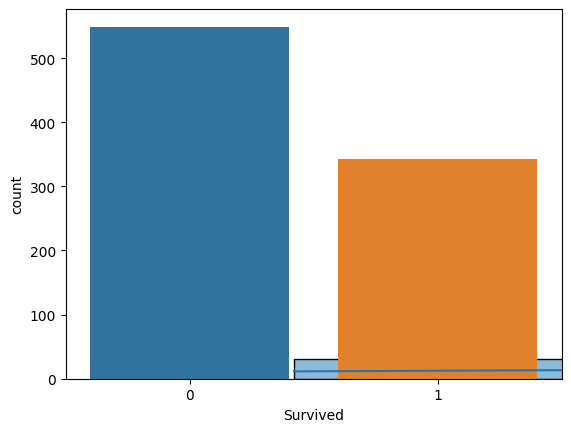

In [48]:
sns.histplot(df['Age'], kde=True)
sns.countplot(x='Survived', data=df)


In [4]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [5]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [6]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [7]:
#df.notnull()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df = df.drop(columns=["PassengerId","Ticket",], axis=1)

In [9]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [11]:
sex=pd.get_dummies(df.Sex,drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [12]:
df.drop("Sex",axis=1,inplace=True)

In [13]:
embarked=pd.get_dummies(df.Embarked,drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [14]:
df.drop("Embarked",axis=1,inplace=True)

In [15]:
df=pd.concat([df,sex,embarked],axis=1)

In [16]:
print(df)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

      Age  SibSp  Parch     Fare    Cabin Title  male  Q  S  
0    22.0      1      0  

In [17]:
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

In [18]:
df.drop('Name', axis=1, inplace=True)

In [19]:
df.drop('Cabin', axis=1, inplace=True)

In [20]:
df.drop('Fare', axis=1, inplace=True)

In [21]:
print(df)

     Survived  Pclass   Age  SibSp  Parch  male  Q  S  Title_Capt  Title_Col  \
0           0       3  22.0      1      0     1  0  1           0          0   
1           1       1  38.0      1      0     0  0  0           0          0   
2           1       3  26.0      0      0     0  0  1           0          0   
3           1       1  35.0      1      0     0  0  1           0          0   
4           0       3  35.0      0      0     1  0  1           0          0   
..        ...     ...   ...    ...    ...   ... .. ..         ...        ...   
886         0       2  27.0      0      0     1  0  1           0          0   
887         1       1  19.0      0      0     0  0  1           0          0   
888         0       3  24.0      1      2     0  0  1           0          0   
889         1       1  26.0      0      0     1  0  0           0          0   
890         0       3  32.0      0      0     1  1  0           0          0   

     ...  Title_Major  Title_Master  Ti

In [22]:
X = df.drop(['Survived'], axis=1)

y = df['Survived']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train.shape, X_test.shape

((712, 24), (179, 24))

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()
# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8156


Run SVM with polynomial kernel and C=100.0

In [27]:
poly_svc=SVC(kernel='poly', C=100.0)

poly_svc.fit(X_train,y_train)


y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.8324


In [28]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB , BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

Checking Other Machine Learning Algorithms Acuracy to Improve the Model Performance

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [30]:
from sklearn.metrics import accuracy_score,precision_score,classification_report
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
lr_precision = precision_score(y_test,logreg_pred )

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")



Logistic Regression Accuracy: 0.8156424581005587
Logistic Regression Precision: 0.75


In [31]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_pre=precision_score(y_test,dt_pred )
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_pre}")



Decision Tree Accuracy: 0.7932960893854749
Decision Tree Precision: 0.7580645161290323


In [32]:
# k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_pre=precision_score(y_test,knn_pred)
print(f"kNN Accuracy: {knn_accuracy}")
print(f"kNN Precision: {knn_pre}")



kNN Accuracy: 0.8324022346368715
kNN Precision: 0.8305084745762712


In [33]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_pre=precision_score(y_test,rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_pre}")



Random Forest Accuracy: 0.8100558659217877
Random Forest Precision: 0.7611940298507462


In [34]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_pre=precision_score(y_test,adaboost_pred)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")
print(f" AdaBoost Precision: {adaboost_pre}")



AdaBoost Accuracy: 0.8100558659217877
 AdaBoost Precision: 0.7536231884057971


In [35]:
# Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_pre=precision_score(y_test,bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")
print(f"Bagging Classifier Precision: {adaboost_pre}")



Bagging Classifier Accuracy: 0.8156424581005587
Bagging Classifier Precision: 0.7536231884057971


In [36]:
# Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)
extra_trees_pre=precision_score(y_test,extra_trees_pred )
print(f"Extra Trees Classifier Accuracy: {extra_trees_accuracy}")
print(f"Extra Trees Classifier Precision: {extra_trees_pre}")


Extra Trees Classifier Accuracy: 0.8044692737430168
Extra Trees Classifier Precision: 0.75


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
gradient_pre=precision_score(y_test,gradient_boosting_pred)
print(f"Gradient Boosting Classifier Accuracy: {gradient_boosting_accuracy}")
print(f"Gradient Boosting Classifier Precision: {gradient_pre}")

# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_pre=precision_score(y_test,xgb_pred)
print(f"XGBoost Classifier Accuracy: {xgb_accuracy}")
print(f"XGBoost Classifier Precision: {xgb_pre}")

Gradient Boosting Classifier Accuracy: 0.8212290502793296
Gradient Boosting Classifier Precision: 0.8032786885245902
XGBoost Classifier Accuracy: 0.8268156424581006
XGBoost Classifier Precision: 0.7878787878787878


In [38]:
#voting classifier
svm=SVC(probability=True)
etc=ExtraTreesClassifier(n_estimators=50)
lr = LogisticRegression()
dt= DecisionTreeClassifier()
knn= KNeighborsClassifier()
rf= RandomForestClassifier()
adaboost= AdaBoostClassifier()
bag= BaggingClassifier()
gr= GradientBoostingClassifier()
xgb= XGBClassifier()
from sklearn.ensemble import VotingClassifier

In [39]:
voting=VotingClassifier(estimators=[('svm',svm),('lr',lr),('dt',dt),('et',etc),('knn',knn),('rf',rf),('ada',adaboost),('bag',bag),('gr',gr),('xgb',xgb)],voting='soft')


In [40]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('et', ExtraTreesClassifier(n_estimators=50)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('bag', BaggingClassifier()),
                             ('gr', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_scor...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [41]:
#Based on Voting Classifier Result GradientBoosting Classifier Algorithm giving more Accuracy.

In [42]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8435754189944135
Precision 0.8360655737704918


In [43]:
model=GradientBoostingClassifier()
model.fit(X,y)

GradientBoostingClassifier()

In [44]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

Test Submission

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.84


In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [47]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[100  10]
 [ 18  51]]
